In [1]:
#imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.formula.api as smf
from statistics import median
from matplotlib.dates import DateFormatter, DayLocator
from matplotlib.dates import DateFormatter, HourLocator
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime
from scipy.optimize import curve_fit
import scipy.optimize
from sklearn.metrics import mean_squared_error

In [2]:
s1d1df = pd.read_csv('s1d1pings.csv')
s1d1df['TIMESTAMP'] = pd.to_datetime(s1d1df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')
s1d1df.reset_index()
s1d1df['ROLLINGTIME'] = s1d1df['ping'].rolling(window=50).mean()
s1d1df['SDEST'] = 'CMU'
s1d1df['SACCESS'] = 'TMOB'
s1d1df

,TIMESTAMP,ping,date,hour,ROLLINGTIME,SDEST,SACCESS
0,2024-03-22 12:54:24.545825,19.0,2024-03-22,12,NaN,CMU,TMOB
1,2024-03-22 12:54:24.545825,22.0,2024-03-22,12,NaN,CMU,TMOB
2,2024-03-22 12:54:24.545825,21.0,2024-03-22,12,NaN,CMU,TMOB
3,2024-03-22 12:54:24.545825,19.0,2024-03-22,12,NaN,CMU,TMOB
4,2024-03-22 12:54:24.545825,22.0,2024-03-22,12,NaN,CMU,TMOB
...,...,...,...,...,...,...,...
9560,2024-04-09 08:14:27.314157,19.0,2024-04-09,8,21.22,CMU,TMOB
9561,2024-04-09 08:14:27.314157,23.0,2024-04-09,8,21.26,CMU,TMOB
9562,2024-04-09 08:14:27.314157,18.0,2024-04-09,8,21.24,CMU,TMOB
9563,2024-04-09 08:14:27.314157,21.0,2024-04-09,8,21.20,CMU,TMOB


In [3]:
s1d2df = pd.read_csv('s1d2pings.csv')
s1d2df['TIMESTAMP'] = pd.to_datetime(s1d2df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')
s1d2df.reset_index()
s1d2df['ROLLINGTIME'] = s1d2df['ping'].rolling(window=50).mean()
s1d2df['SDEST'] = 'AWS'
s1d2df['SACCESS'] = 'TMOB'
s1d2df

,TIMESTAMP,ping,date,hour,ROLLINGTIME,SDEST,SACCESS
0,2024-03-22 12:54:40.397297,37.0,2024-03-22,12,NaN,AWS,TMOB
1,2024-03-22 12:54:40.397297,37.0,2024-03-22,12,NaN,AWS,TMOB
2,2024-03-22 12:54:40.397297,33.0,2024-03-22,12,NaN,AWS,TMOB
3,2024-03-22 12:54:40.397297,37.0,2024-03-22,12,NaN,AWS,TMOB
4,2024-03-22 12:54:40.397297,38.0,2024-03-22,12,NaN,AWS,TMOB
...,...,...,...,...,...,...,...
8633,2024-04-09 08:15:12.196305,37.0,2024-04-09,8,36.08,AWS,TMOB
8634,2024-04-09 08:15:12.196305,32.0,2024-04-09,8,36.00,AWS,TMOB
8635,2024-04-09 08:15:12.196305,34.0,2024-04-09,8,35.90,AWS,TMOB
8636,2024-04-09 08:15:12.196305,37.0,2024-04-09,8,35.96,AWS,TMOB


In [4]:
main_df = pd.concat([s1d1df, s1d2df], ignore_index=True)

In [5]:
def ts_lineplot(fdf,ylst,title='',filename='tmp.png',saveon=False,figsize=(15,10),**kwargs):
    # print(title)
    ax = fdf.reset_index().plot(x='TIMESTAMP',y = ylst,title=title,figsize=figsize,**kwargs)
    ax.grid(True)
    return ax

C:\Users\Rohini Pillai\AppData\Local\Temp\ipykernel_944\2150115229.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1[colname] = fdf1['ping'].rolling(WINDOW).mean()
C:\Users\Rohini Pillai\AppData\Local\Temp\ipykernel_944\2150115229.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1[colname] = fdf1['ping'].rolling(WINDOW).mean()


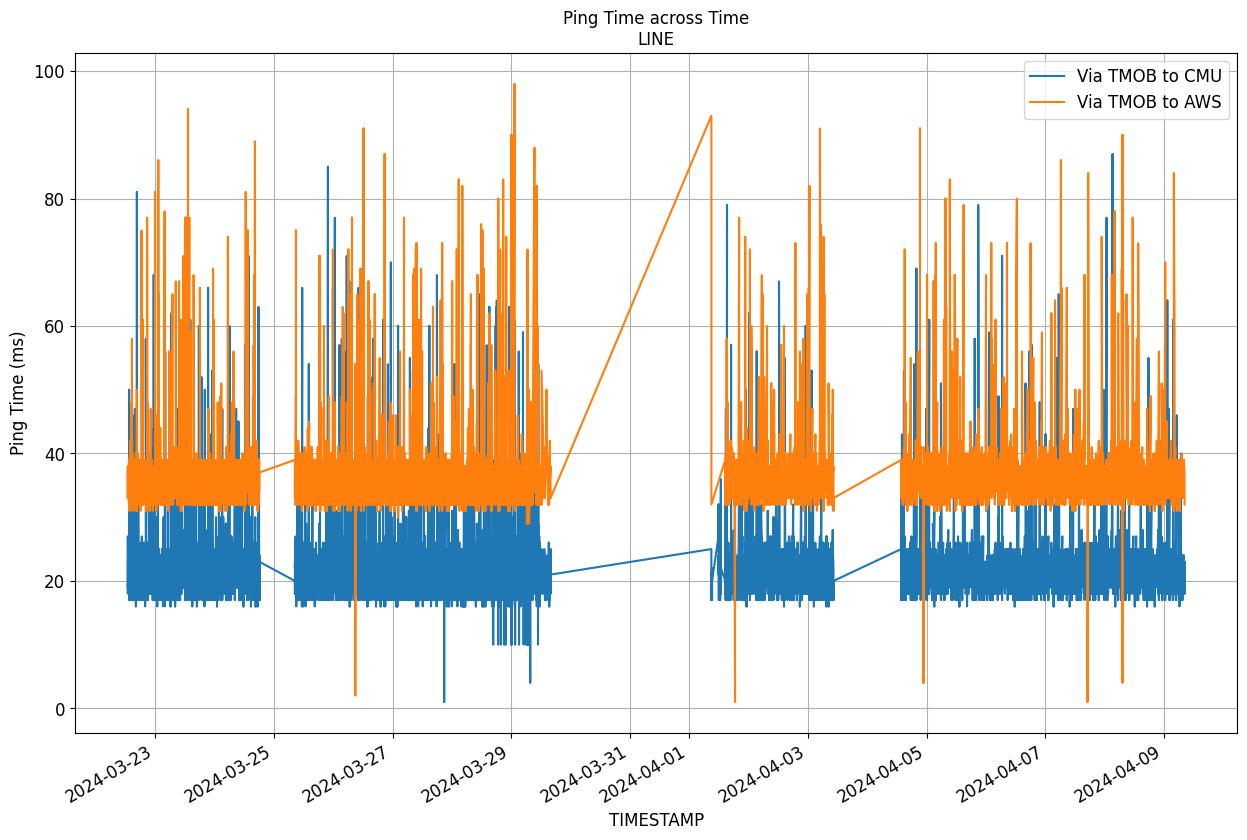

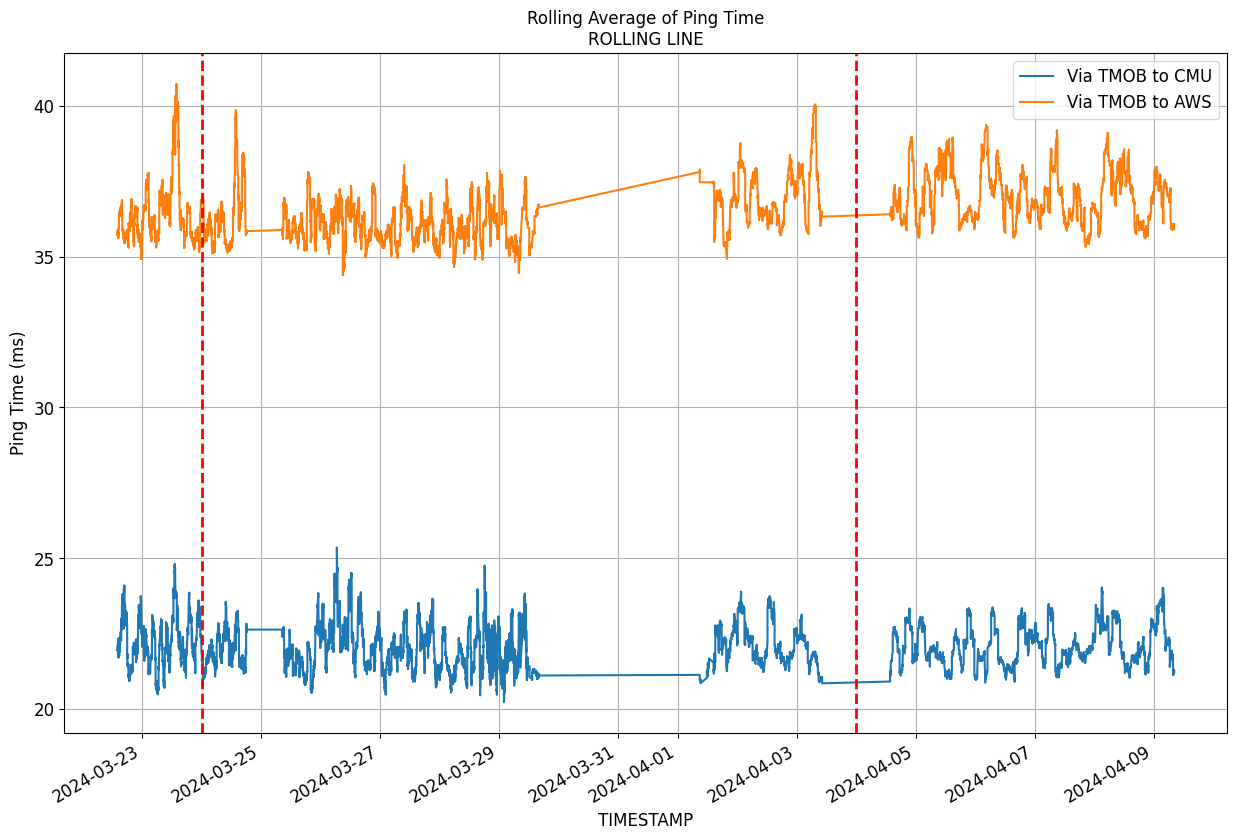

In [6]:
colname='ROLLINGTIME'
# WINDOW=int(np.round(60/7*4,0))
WINDOW=50
#print(WINDOW,main_df.TIME.min(),main_df.TIME.max())
def makeLine(fdf,col,title="Rolling Average (to CMU via TMOB)", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(main_df.SDEST == SDEST) & (main_df.SACCESS == SACCESS)]
            if col == 'ROLLINGTIME':
                fdf1[colname] = fdf1['ping'].rolling(WINDOW).mean()
            ax = ts_lineplot(fdf1,[col], ax=ax, title=title,legend=True)
            legendlabellst.append(f"Via {SACCESS} to {SDEST}")
    ax.legend(labels=legendlabellst)
    ax.set_title(title,fontsize=12)
    ax.set_ylabel("Ping Time (ms)")
main_rolling_df = main_df.copy()
makeLine(main_rolling_df,"ping",filename="PING LINE TEST.png",title= 'Ping Time across Time' + "\nLINE")
makeLine(main_rolling_df,"ROLLINGTIME",filename="ROLLING PING LINE TEST.png",title= 'Rolling Average of Ping Time' + "\nROLLING LINE")

vertical_line_date_1 = pd.Timestamp('2024-03-24')
plt.axvline(x=vertical_line_date_1, color='r', linestyle='--', linewidth=2)
vertical_line_date_2 = pd.Timestamp('2024-04-04')
plt.axvline(x=vertical_line_date_2, color='r', linestyle='--', linewidth=2)